# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [68]:
#%pip install tensorflow --upgrade
#%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
#from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [69]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [70]:
model = Sequential()
model.add(Dense(150, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

/home/bolux/Documents/HEIG/ARN/labo3/vemv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,260 (465.86 KB)

 Trainable params: 119,260 (465.86 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [71]:
batch_size = 128
n_epoch = 35

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7932 - loss: 0.7153 - val_accuracy: 0.9470 - val_loss: 0.1832
Epoch 2/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9176 - loss: 0.2777 - val_accuracy: 0.9637 - val_loss: 0.1327
Epoch 3/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9392 - loss: 0.2117 - val_accuracy: 0.9705 - val_loss: 0.1122
Epoch 4/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 0.1891 - val_accuracy: 0.9697 - val_loss: 0.1064
Epoch 5/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9513 - loss: 0.1637 - val_accuracy: 0.9733 - val_loss: 0.0940
Epoch 6/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9538 - loss: 0.1589 - val_accuracy: 0.9742 - val_loss: 0.0895
Epoch 7/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9588 - loss: 0.1434 - val_accuracy: 0.9767 - val_loss: 0.0843
Epoch 8/35
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9596 - loss: 0.1339 - val_accuracy: 0.

Show the performance of the model

Test score: 0.0843280479311943
Test accuracy: 0.980400025844574


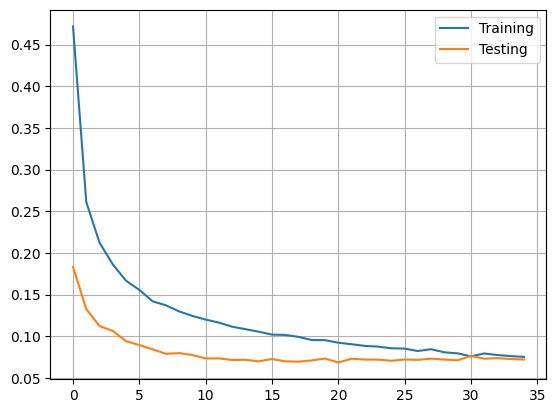

In [72]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ 969,    0,    2,    2,    2,    1,    2,    1,    1,    0],
       [   0, 1125,    3,    1,    0,    1,    1,    1,    3,    0],
       [   1,    0, 1015,    0,    4,    0,    2,    6,    4,    0],
       [   0,    0,    3,  990,    0,    8,    0,    6,    2,    1],
       [   0,    0,    2,    0,  963,    0,    5,    1,    2,    9],
       [   2,    0,    0,    6,    0,  869,    6,    1,    5,    3],
       [   4,    3,    0,    1,    4,    3,  940,    0,    3,    0],
       [   2,    3,   11,    4,    0,    1,    0, 1001,    0,    6],
       [   3,    1,    3,    2,    4,    1,    1,    5,  950,    4],
       [   1,    4,    0,    5,   10,    2,    0,    5,    0,  982]])